In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
import string
import nltk
import os

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 6]}, font_scale=1.2)
plt.figure(figsize=(12, 6))
df = pd.read_csv('spam.csv', encoding='cp1252')

<Figure size 1200x600 with 0 Axes>

In [144]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [145]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [147]:
# drop last 3 columns as most of them are null values
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [148]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [149]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
encoder = LabelEncoder()

# transform categorical data to numeric
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [151]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [152]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [153]:
# remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [154]:
df.shape

(5169, 2)

# 2. EDA

In [155]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [156]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

C:\Users\AIO\AppData\Local\Temp\ipykernel_2536\4068857251.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis',order=sorted(df['target'].unique()))


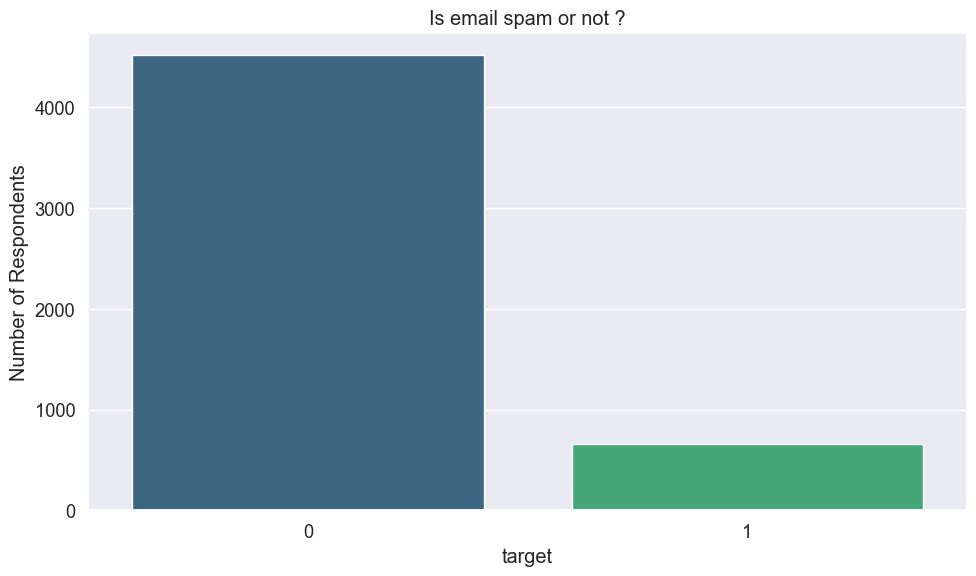

In [157]:
sns.countplot(x='target', data=df, palette='viridis',order=sorted(df['target'].unique()))
plt.title("Is email spam or not ?")
plt.ylabel("Number of Respondents")
plt.xlabel("target")
plt.tight_layout()
plt.show()

##### Feature Engineering might identify spam emails

In [158]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [159]:

#!pip install nltk
#!pip install wordcloud

In [160]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\AIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [162]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [163]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [164]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [165]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### How character counts differ between spam and ham ?

<Axes: xlabel='num_characters', ylabel='Count'>

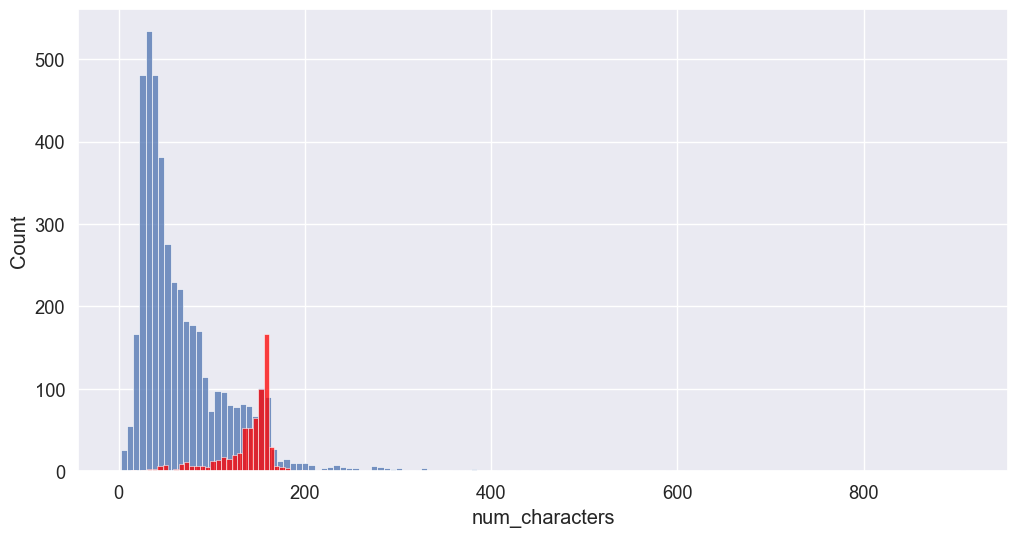

In [166]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

### How number of words differ between spam and ham ?

<Axes: xlabel='num_words', ylabel='Count'>

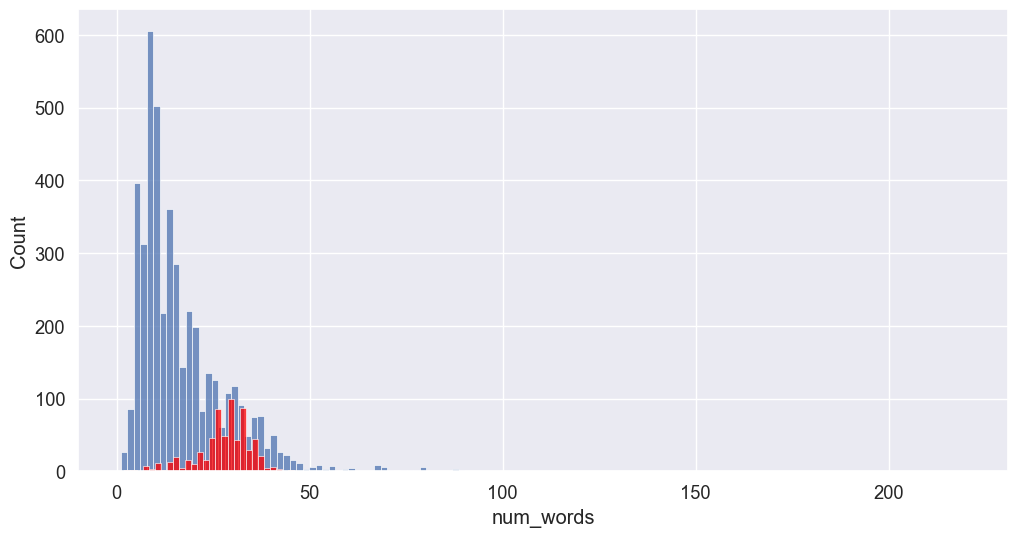

In [167]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

### Comprehensive matrix to show correlation between these new features and detect outliers

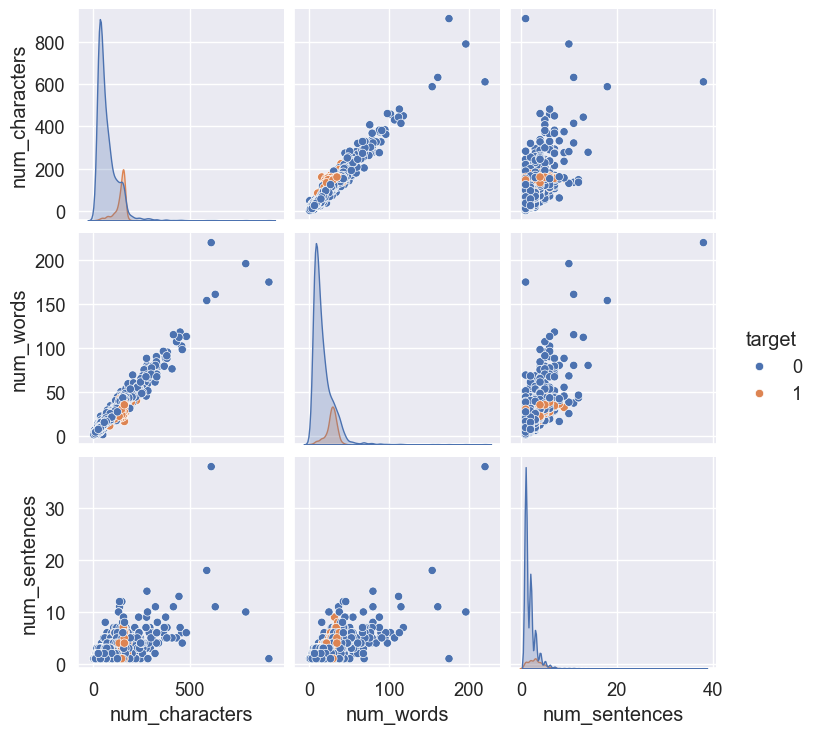

In [168]:
sns.pairplot(df,hue='target')

<Axes: >

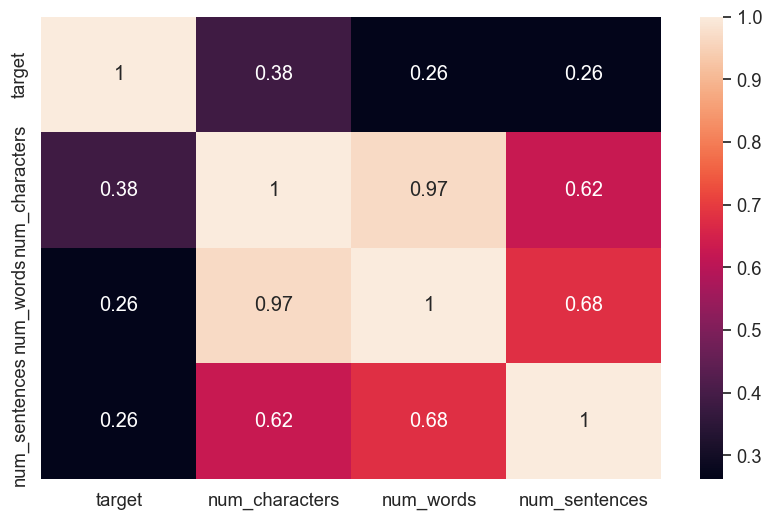

In [169]:
correlation_matrix = df.drop(columns=['text']).corr()
sns.heatmap(correlation_matrix,annot=True)

# 3. Data Preprocessing
<ul>
<li>Lower case
<li>Tokenization
<li>Removing special characters
<li>Removing stop words and punctuation
<li>Stemming
</ul>

In [170]:
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    #Remove non-alphanumeric characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Step 4: Remove stopwords and punctuation as words is, and, the
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    
    #(stem)reduce words to their root as 'running' → 'run'
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [171]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [172]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

### Add column for text after transformation

In [173]:
df['transformed_text'] = df['text'].apply(transform_text)

In [174]:
#ensure it works
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


###  Common patterns and frequently used words in Spam

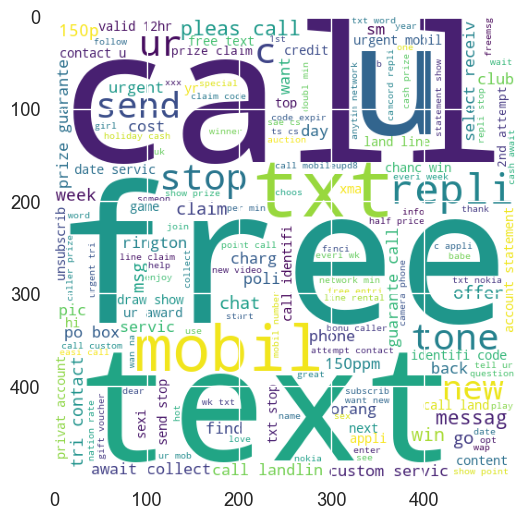

In [175]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

###  Common patterns and frequently used words in Ham

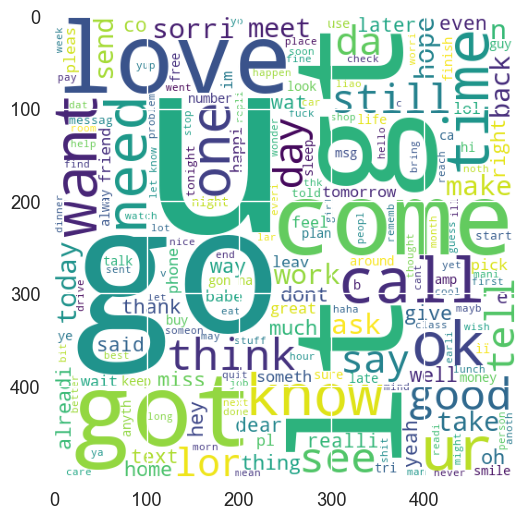

In [176]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [177]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Make a Word Bank of Spam Terms

In [178]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
#Total Number of Words
len(spam_corpus)

9939

###  What are the 30 most common words in spam messages

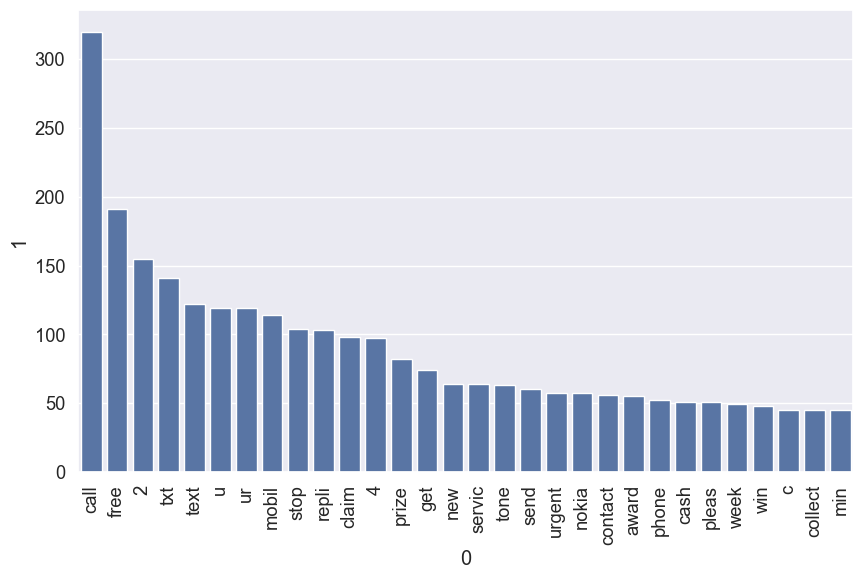

In [179]:
common_words = Counter(spam_corpus).most_common(30)
sns.barplot(x=pd.DataFrame(common_words)[0], y=pd.DataFrame(common_words)[1])
plt.xticks(rotation=90)
plt.show()

### ### Make Word Bank of Ham Terms

In [180]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

###  What are the 30 most common words in Ham messages

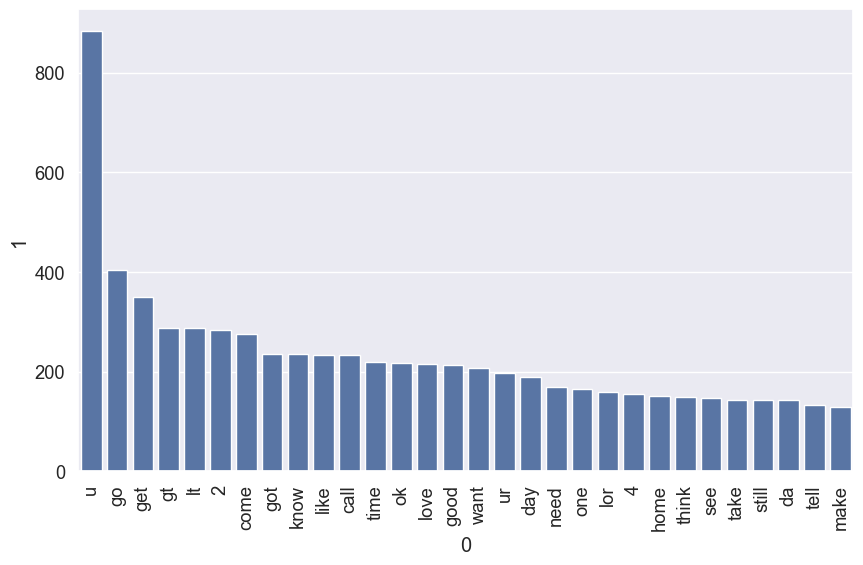

In [181]:
common_words = Counter(ham_corpus).most_common(30)
sns.barplot(x=pd.DataFrame(common_words)[0], y=pd.DataFrame(common_words)[1])
plt.xticks(rotation=90)
plt.show()

In [182]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [183]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [184]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [185]:
X.shape

(5169, 3000)

In [186]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [187]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


## split data

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [190]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Using GaussianNB

In [191]:
# Train the model
gnb.fit(X_train, y_train)

# Predict on training data
y_train_pred1 = gnb.predict(X_train)
y_test_pred1 = gnb.predict(X_test)

# Accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred1)
print('Training Accuracy: ', train_accuracy)

# Accuracy on testing data
test_accuracy = accuracy_score(y_test, y_test_pred1)
print('Testing Accuracy: ', test_accuracy)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred1))
print('Precision Score: ', precision_score(y_test, y_test_pred1))


Training Accuracy:  0.8931076178960097
Testing Accuracy:  0.8733075435203095
Confusion Matrix:
[[790 106]
 [ 25 113]]
Precision Score:  0.5159817351598174


## Using MultinomialNB

In [192]:
# Train the model
mnb.fit(X_train, y_train)

# Predict on training data
y_train_pred2= mnb.predict(X_train)
y_test_pred2 = mnb.predict(X_test)

# Accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred2)
print('Training Accuracy: ', train_accuracy)

# Accuracy on testing data
test_accuracy = accuracy_score(y_test, y_test_pred2)
print('Testing Accuracy: ', test_accuracy)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred2))
print('Precision Score: ', precision_score(y_test, y_test_pred2))


Training Accuracy:  0.9787182587666263
Testing Accuracy:  0.9709864603481625
Confusion Matrix:
[[896   0]
 [ 30 108]]
Precision Score:  1.0


## Using BernoulliNB

In [193]:
# Train the model
bnb.fit(X_train, y_train)

# Predict on training data
y_train_pred3= bnb.predict(X_train)
y_test_pred3 = bnb.predict(X_test)

# Accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred3)
print('Training Accuracy: ', train_accuracy)

# Accuracy on testing data
test_accuracy = accuracy_score(y_test, y_test_pred3)
print('Testing Accuracy: ', test_accuracy)

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred3))
print('Precision Score: ', precision_score(y_test, y_test_pred3))


Training Accuracy:  0.985006045949214
Testing Accuracy:  0.9835589941972921
Confusion Matrix:
[[895   1]
 [ 16 122]]
Precision Score:  0.991869918699187


In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [195]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [196]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Get predictions on training data
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Get predictions on test data
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy , test_precision


In [197]:
train_accuracy_scores = []
test_accuracy_scores = []
test_precision_scores = []

for name, clf in clfs.items():
    train_acc, test_acc, test_prec = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )
    print(f"\nFor {name}:")
    print(f"Training Accuracy - {train_acc:.4f}")
    print(f"Test Accuracy     - {test_acc:.4f}")
    print(f"Test Precision    - {test_prec:.4f}")
    
    train_accuracy_scores.append(train_acc)
    test_accuracy_scores.append(test_acc)
    test_precision_scores.append(test_prec)


For SVC:
Training Accuracy - 0.9838
Test Accuracy     - 0.9758
Test Precision    - 0.9748

For KN:
Training Accuracy - 0.9255
Test Accuracy     - 0.9052
Test Precision    - 1.0000

For NB:
Training Accuracy - 0.9787
Test Accuracy     - 0.9710
Test Precision    - 1.0000

For DT:
Training Accuracy - 0.9499
Test Accuracy     - 0.9294
Test Precision    - 0.8283

For LR:
Training Accuracy - 0.9642
Test Accuracy     - 0.9565
Test Precision    - 0.9697

For RF:
Training Accuracy - 0.9995
Test Accuracy     - 0.9768
Test Precision    - 0.9750


c:\Users\AIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



For AdaBoost:
Training Accuracy - 0.9724
Test Accuracy     - 0.9691
Test Precision    - 0.9732

For BgC:
Training Accuracy - 0.9995
Test Accuracy     - 0.9594
Test Precision    - 0.8692

For ETC:
Training Accuracy - 0.9995
Test Accuracy     - 0.9778
Test Precision    - 0.9675

For GBDT:
Training Accuracy - 0.9676
Test Accuracy     - 0.9507
Test Precision    - 0.9307

For xgb:
Training Accuracy - 0.9843
Test Accuracy     - 0.9681
Test Precision    - 0.9339


In [198]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Training Accuracy': train_accuracy_scores,
    'Test Accuracy': test_accuracy_scores,
    'Test Precision': test_precision_scores
}).sort_values('Test Precision', ascending=False)

print("\nPerformance Summary:")
print(performance_df)


Performance Summary:
   Algorithm  Training Accuracy  Test Accuracy  Test Precision
1         KN           0.925514       0.905222        1.000000
2         NB           0.978718       0.970986        1.000000
5         RF           0.999516       0.976789        0.975000
0        SVC           0.983797       0.975822        0.974790
6   AdaBoost           0.972430       0.969052        0.973214
4         LR           0.964208       0.956480        0.969697
8        ETC           0.999516       0.977756        0.967480
10       xgb           0.984281       0.968085        0.933884
9       GBDT           0.967594       0.950677        0.930693
7        BgC           0.999516       0.959381        0.869231
3         DT           0.949940       0.929400        0.828283


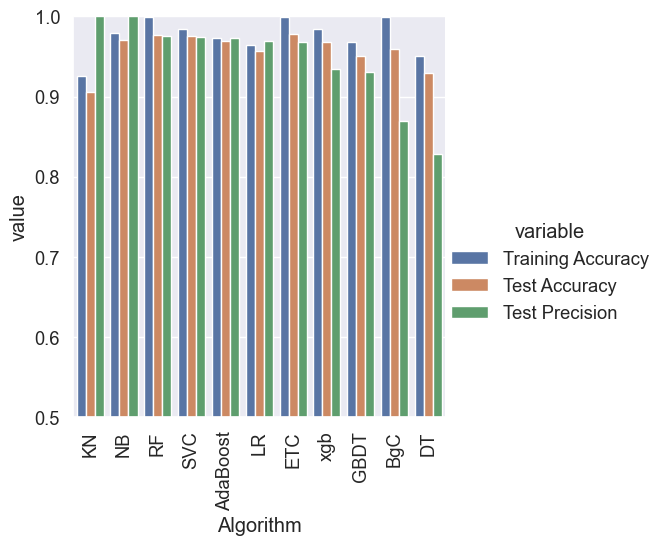

In [199]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data= performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [205]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Training_Accuracy': train_accuracy_scores,
    'Test_Accuracy_max_ft_3000': test_accuracy_scores,
    'Precision_max_ft_3000': test_precision_scores
}).sort_values('Precision_max_ft_3000', ascending=False)


In [207]:
temp_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Training_Accuracy': train_accuracy_scores,
    'Test_Accuracy_scaling': test_accuracy_scores,
    'Precision_scaling': test_precision_scores
}).sort_values('Precision_scaling', ascending=False)


In [209]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':test_accuracy_scores ,'Precision_num_chars':test_precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Training Accuracy,Test Accuracy,Test Precision,Training_Accuracy_x,Test_Accuracy_scaling_x,Precision_scaling_x,Training_Accuracy_y,Test_Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.925514,0.905222,1.000000,0.925514,0.905222,1.000000,0.925514,0.905222,1.000000,0.905222,1.000000
1,NB,0.978718,0.970986,1.000000,0.978718,0.970986,1.000000,0.978718,0.970986,1.000000,0.970986,1.000000
2,RF,0.999516,0.976789,0.975000,0.999516,0.976789,0.975000,0.999516,0.976789,0.975000,0.976789,0.975000
3,SVC,0.983797,0.975822,0.974790,0.983797,0.975822,0.974790,0.983797,0.975822,0.974790,0.975822,0.974790
4,AdaBoost,0.972430,0.969052,0.973214,0.972430,0.969052,0.973214,0.972430,0.969052,0.973214,0.969052,0.973214
5,LR,0.964208,0.956480,0.969697,0.964208,0.956480,0.969697,0.964208,0.956480,0.969697,0.956480,0.969697
6,ETC,0.999516,0.977756,0.967480,0.999516,0.977756,0.967480,0.999516,0.977756,0.967480,0.977756,0.967480
7,xgb,0.984281,0.968085,0.933884,0.984281,0.968085,0.933884,0.984281,0.968085,0.933884,0.968085,0.933884
8,GBDT,0.967594,0.950677,0.930693,0.967594,0.950677,0.930693,0.967594,0.950677,0.930693,0.950677,0.930693
9,BgC,0.999516,0.959381,0.869231,0.999516,0.959381,0.869231,0.999516,0.959381,0.869231,0.959381,0.869231


In [210]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


### Voting Classifier

In [211]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [212]:
y_pred = voting.predict(X_test)
y_train_pred = voting.predict(X_train)
print("Training Accuracy",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy",accuracy_score(y_test,y_pred))
print("Testing Precision",precision_score(y_test,y_pred))

Training Accuracy 0.9937122128174123
Testing Accuracy 0.9796905222437138
Testing Precision 0.9834710743801653


### Applying stacking

In [213]:

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [214]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print("Training Accuracy",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy",accuracy_score(y_test,y_pred))
print("Testing Precision",precision_score(y_test,y_pred))

Training Accuracy 0.9949214026602177
Testing Accuracy 0.9796905222437138
Testing Precision 0.9465648854961832


In [215]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))